In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')

<ipython-input-2-c242cc7acb8e>:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')


In [3]:
# Display the first few rows of the dataframe
print(df.head())

   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [4]:
# Select relevant columns for community engagement analysis
engagement_columns = ['StackOverflowVisit', 'StackOverflowParticipate', 'StackOverflowHasAccount',
                      'StackOverflowConsiderMember', 'StackOverflowJobs', 'StackOverflowDevStory',
                      'StackOverflowJobsRecommend']

In [5]:
# Filter the dataset with selected columns
engagement_df = df[engagement_columns]

In [6]:
# Display the first few rows of the filtered dataframe
print(engagement_df.head())

                StackOverflowVisit  \
0           Multiple times per day   
1  A few times per month or weekly   
2                              NaN   
3             A few times per week   
4            Daily or almost daily   

                            StackOverflowParticipate StackOverflowHasAccount  \
0  I have never participated in Q&A on Stack Over...                     Yes   
1                    A few times per month or weekly                     Yes   
2                                                NaN                     NaN   
3                    A few times per month or weekly                     Yes   
4                Less than once per month or monthly                     Yes   

  StackOverflowConsiderMember  \
0                         Yes   
1                         Yes   
2                         NaN   
3                         Yes   
4                         Yes   

                                   StackOverflowJobs  \
0  No, I knew that Stack Overflow h

In [7]:
# Function to plot engagement metrics
def plot_engagement_metric(column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=engagement_df[column], order = engagement_df[column].value_counts().index)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Response')
    plt.show()

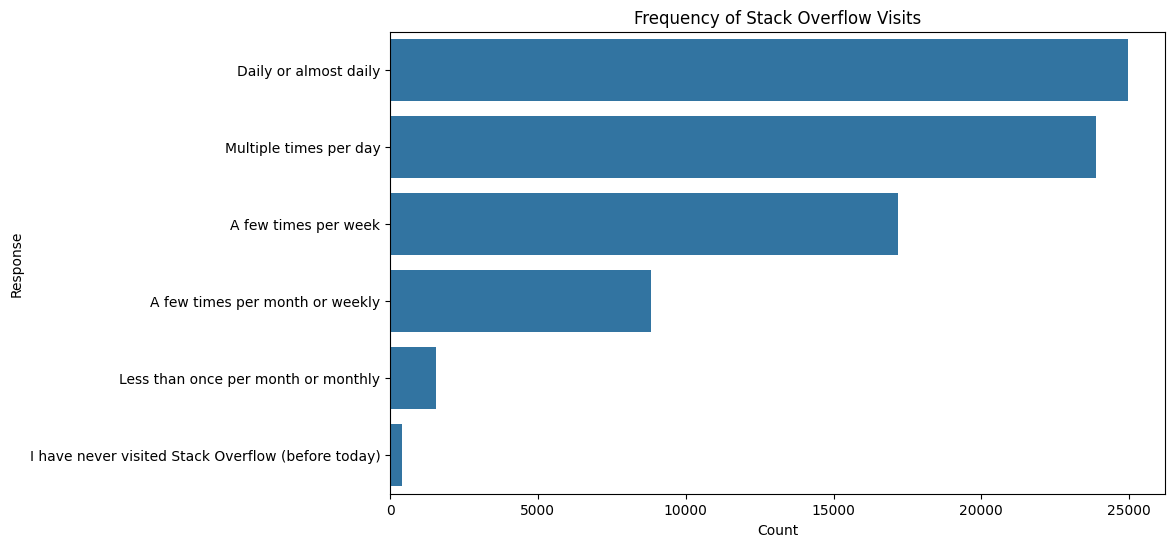

In [8]:
# Plot engagement metrics for StackOverflowVisit
plot_engagement_metric('StackOverflowVisit', 'Frequency of Stack Overflow Visits')

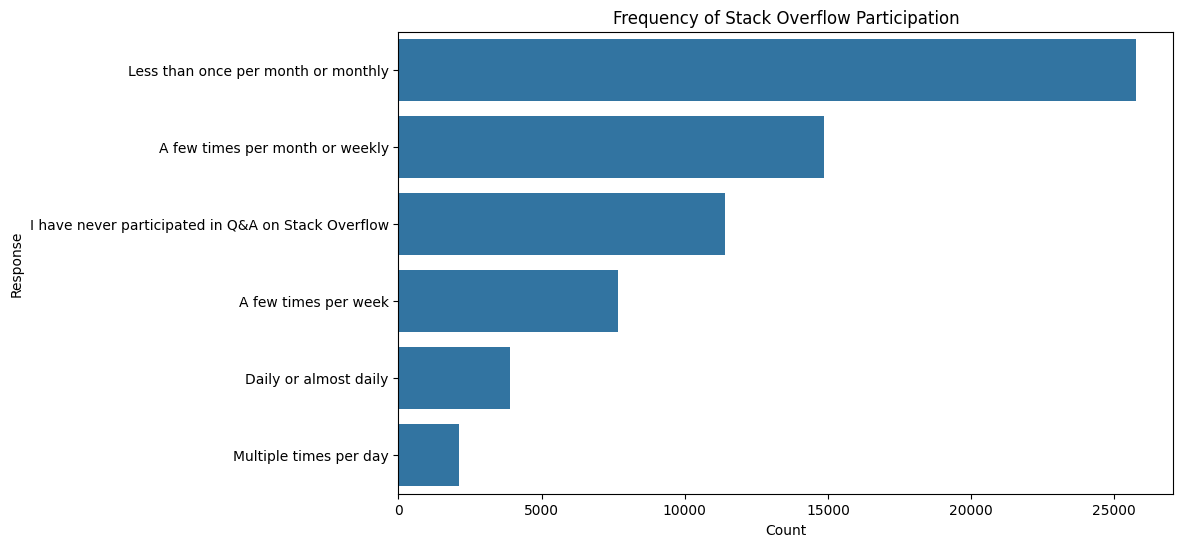

In [9]:
# Plot engagement metrics for StackOverflowParticipate
plot_engagement_metric('StackOverflowParticipate', 'Frequency of Stack Overflow Participation')

In [10]:
# Analysis of users who visit Stack Overflow frequently and participate
frequent_visitors = engagement_df[engagement_df['StackOverflowVisit'] == 'Multiple times per day']
frequent_participants = frequent_visitors[frequent_visitors['StackOverflowParticipate'] == 'Yes']

In [11]:
# Display statistics for frequent participants
print(frequent_participants.describe())

       StackOverflowVisit StackOverflowParticipate StackOverflowHasAccount  \
count                   0                        0                       0   
unique                  0                        0                       0   
top                   NaN                      NaN                     NaN   
freq                  NaN                      NaN                     NaN   

       StackOverflowConsiderMember StackOverflowJobs StackOverflowDevStory  \
count                            0                 0                     0   
unique                           0                 0                     0   
top                            NaN               NaN                   NaN   
freq                           NaN               NaN                   NaN   

       StackOverflowJobsRecommend  
count                           0  
unique                          0  
top                           NaN  
freq                          NaN  


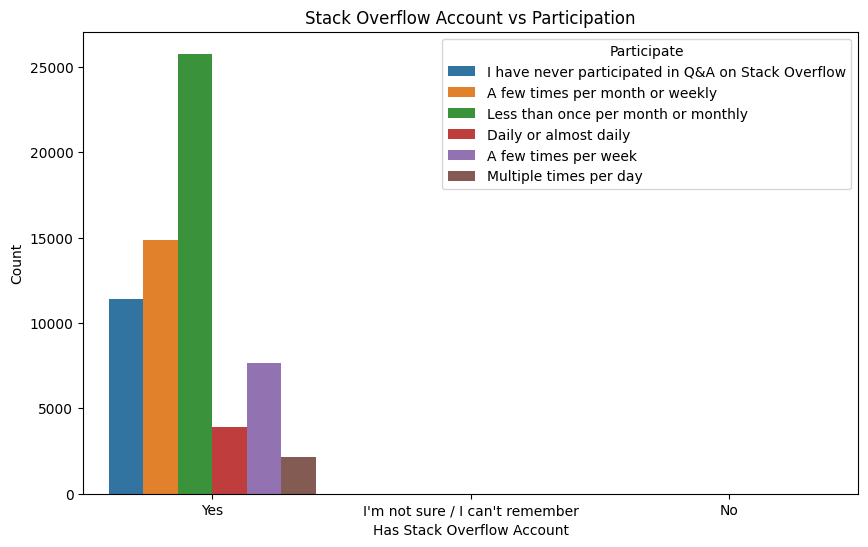

In [12]:
# Plot the relationship between having a Stack Overflow account and participation
plt.figure(figsize=(10, 6))
sns.countplot(x='StackOverflowHasAccount', hue='StackOverflowParticipate', data=engagement_df)
plt.title('Stack Overflow Account vs Participation')
plt.xlabel('Has Stack Overflow Account')
plt.ylabel('Count')
plt.legend(title='Participate')
plt.show()